In [1]:
import sys,os
# add the path to the library and load it
sys.path.insert(0, os.path.abspath("../../"))
from EPlink.Experimental_MS2_GPDC import Generate_multistate_trajectory,Gen_MS2_measurement,MS2_GPDC
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(42)
from jax import numpy as jnp

In [14]:

trajlen = 300
w = 10
kappa = 0.01

kplus,kminus = 1,1
dt = 0.1/3
lambda_scale = 10/w/dt
noise_std = np.sqrt(lambda_scale*w*dt)

X,Y,loading_rates = [],[],[]
for i in range(10):
    states,traj = Generate_multistate_trajectory(kplus,kminus,2,np.ones(trajlen),dt=dt)
    loading_rate = (traj/0.5+0.5).astype(float)*lambda_scale
    xdat,ydat = Gen_MS2_measurement(loading_rate,[w,kappa,noise_std],dt,random_pol2=True)
    
    max_mindiff = np.max(ydat[2])#-np.min(ydat[2])
    
    X.append([xdat[0],xdat[1]+max_mindiff/w/dt])
    Y.append([ydat[0],ydat[1]+max_mindiff,ydat[2]+max_mindiff])
    loading_rates.append(loading_rate+max_mindiff/w/dt)
    


X_vals,Y_vals = [ydat[0] for ydat in Y],[ydat[2] for ydat in Y]
GPDC = MS2_GPDC("D")
out = GPDC.Fit_params(X_vals,Y_vals,[dt*w,np.sqrt(np.mean(Y_vals)),noise_std],5,batch_size=100)



Deterministic
[256.61815389  19.0271244   -3.49096922]
[0.64734013 7.89344183 3.69985987]
[-1.61802892 17.95737542 -5.58898418]
[-14.33958407  79.88877106 -48.98781211]
[ 0.29692964 11.36349169  2.29791696]
[ 0.28210933 11.50554208  2.26505998]
[ 0.29080435 11.80175671  2.43835426]
[ 0.29047988 11.92106237  2.45938275]
[ 0.29050054 11.95147707  2.46531342]
[ 0.29054136 11.95502053  2.46554386]
[ 0.29057976 11.95647054  2.46536777]
[ 0.29058138 11.95629711  2.46531208]
[ 0.29072251 11.9606715   2.4644746 ]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 829.4710083007812
            Iterations: 13
            Function evaluations: 46
            Gradient evaluations: 13


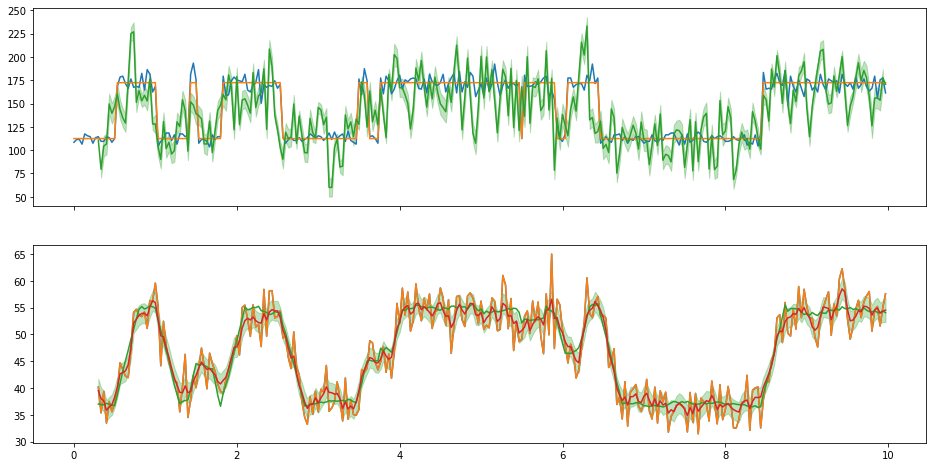

In [16]:

i = np.random.randint(0,len(X))
xdat,ydat,loading_rate = X[i],Y[i],loading_rates[i]
mu_func,v_cov_func,MS2_mu_func,MS2_cov_func = GPDC.Get_Predfunc(np.abs(np.array([dt*w,10,noise_std])),ydat[0],ydat[2])



fig,ax = plt.subplots(2,1,figsize=(16,8),sharex=True)
ax[0].plot(xdat[0],xdat[1])
ax[0].plot(xdat[0],loading_rate)
ax[0].plot(ydat[0],mu_func(ydat[0]))
ax[0].fill_between(ydat[0],mu_func(ydat[0])-jnp.sqrt(v_cov_func(ydat[0],ydat[0])),mu_func(ydat[0])+jnp.sqrt(v_cov_func(ydat[0],ydat[0])),alpha=0.3,color="C2")

ax[1].plot(ydat[0],ydat[-1])
ax[1].plot(ydat[0],ydat[2])
ax[1].plot(ydat[0],ydat[1])
ax[1].plot(ydat[0],MS2_mu_func(ydat[0]))
ax[1].fill_between(ydat[0],MS2_mu_func(ydat[0])-jnp.sqrt(MS2_cov_func(ydat[0],ydat[0])),MS2_mu_func(ydat[0])+jnp.sqrt(MS2_cov_func(ydat[0],ydat[0])),alpha=0.3,color="C2")
